In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
salaries = pd.read_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\player_salaries\Salary_data_2022_23_noteam.csv")
salaries.head(5)

,Unnamed: 0,Player,Salary
0,0,Stephen Curry,"$48,070,014"
1,1,John Wall,"$47,345,760"
2,2,Russell Westbrook,"$47,080,179"
3,3,LeBron James,"$44,474,988"
4,4,Kevin Durant,"$44,119,845"


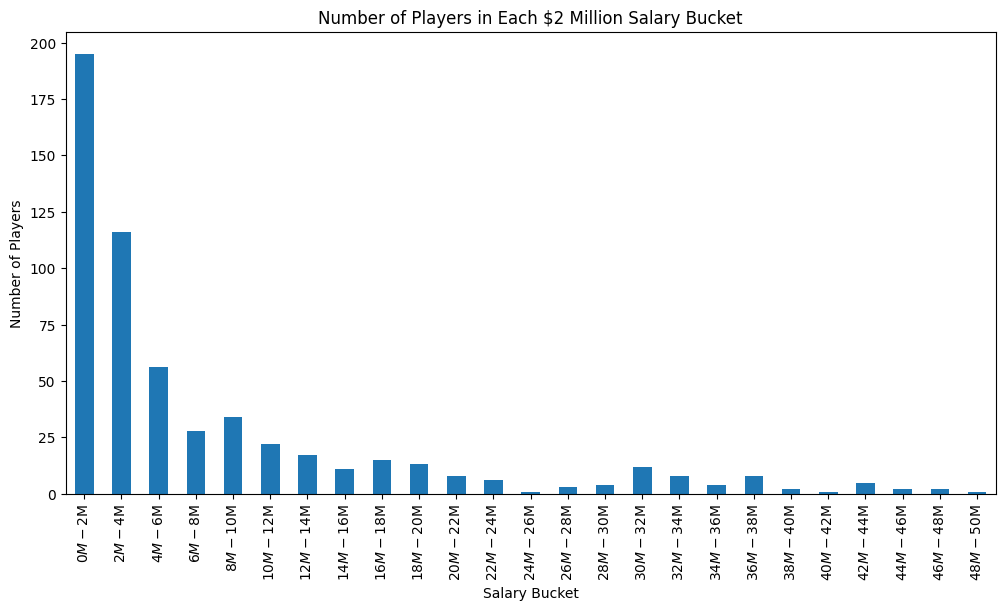

In [5]:
# Remove the dollar sign and commas from the Salary column and convert it to numeric
salaries['Salary'] = salaries['Salary'].replace('[\$,]', '', regex=True).astype(float)

# Create 2 million dollar buckets
bins = np.arange(0, salaries['Salary'].max() + 2000000, 2000000)
labels = [f'${int(b/1000000)}M-${int((b+2000000)/1000000)}M' for b in bins[:-1]]
salaries['Salary Bucket'] = pd.cut(salaries['Salary'], bins=bins, labels=labels, right=False)

# Plot the number of players in each bucket
bucket_counts = salaries['Salary Bucket'].value_counts().sort_index()
bucket_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Salary Bucket')
plt.ylabel('Number of Players')
plt.title('Number of Players in Each $2 Million Salary Bucket')
plt.show()

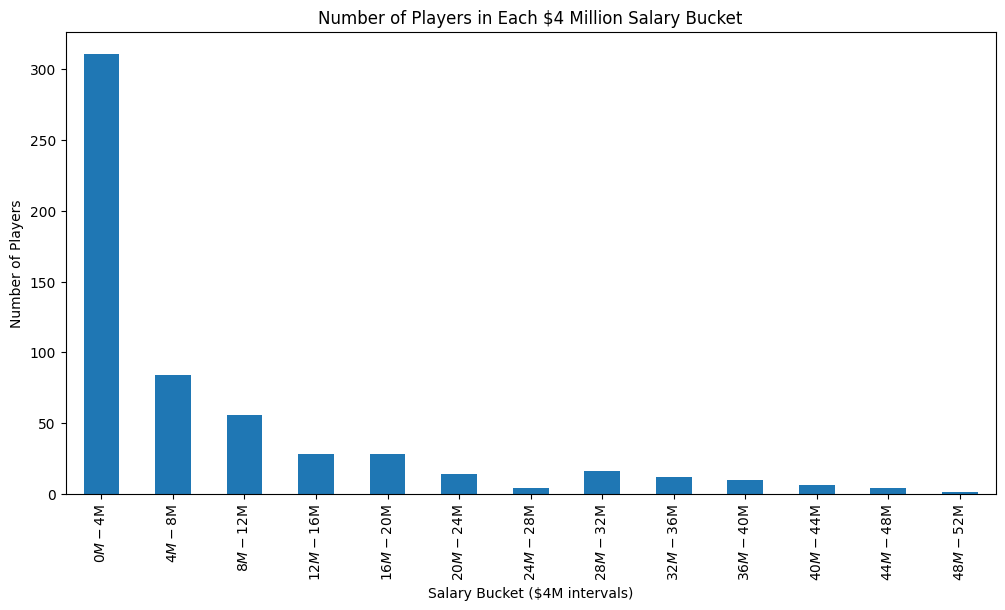

In [6]:
# Create 4 million dollar buckets
bins_4m = np.arange(0, salaries['Salary'].max() + 4000000, 4000000)
labels_4m = [f'${int(b/1000000)}M-${int((b+4000000)/1000000)}M' for b in bins_4m[:-1]]
salaries['Salary Bucket 4M'] = pd.cut(salaries['Salary'], bins=bins_4m, labels=labels_4m, right=False)

# Plot the number of players in each 4 million dollar bucket
bucket_counts_4m = salaries['Salary Bucket 4M'].value_counts().sort_index()
bucket_counts_4m.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Salary Bucket ($4M intervals)')
plt.ylabel('Number of Players')
plt.title('Number of Players in Each $4 Million Salary Bucket')
plt.show()

In [7]:
player_stats22 = pd.read_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\player_stats\stats_2022_23.csv")
#drop all rows where team is TOT
player_stats22 = player_stats22[player_stats22['Tm'] != 'TOT']
player_stats22.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,aldamsa01


In [8]:
merged_df = pd.merge(player_stats22[['Player', 'Tm']], salaries[['Player', 'Salary']], how='right', left_on='Player', right_on='Player')
merged_df.head(5)

,Player,Tm,Salary
0,Stephen Curry,GSW,48070014.0
1,John Wall,LAC,47345760.0
2,Russell Westbrook,LAL,47080179.0
3,Russell Westbrook,LAC,47080179.0
4,LeBron James,LAL,44474988.0


In [ ]:
# Get the unique teams
teams = merged_df['Tm'].dropna().unique()

# Create a plot for each team
for team in teams:
    team_data = merged_df[merged_df['Tm'] == team]
    plt.figure(figsize=(12, 6))
    plt.xlim(0, 50000000)
    #the x tics should be in millions
    plt.xticks(np.arange(0, 50000000, 10000000), [f'${int(t/1000000)}M' for t in np.arange(0, 50000000, 10000000)])
    # the y ticks should be in 1s
    plt.yticks(np.arange(0, 21, 1))
    plt.hist(team_data['Salary'], bins=25, edgecolor='black')
    plt.xlabel('Salary')
    plt.ylabel('Number of Players')
    plt.title(f'Salary Distribution for {team}')
    plt.show()

In [ ]:
#fit a pareto distribution to the salaries
from scipy.stats import pareto

# Fit a Pareto distribution to the salaries
params = pareto.fit(merged_df['Salary'])
print('Pareto Distribution Parameters:', params)



Pareto Distribution Parameters: (2.2645656239343612, -11055523.2163472, 11061372.216347199)


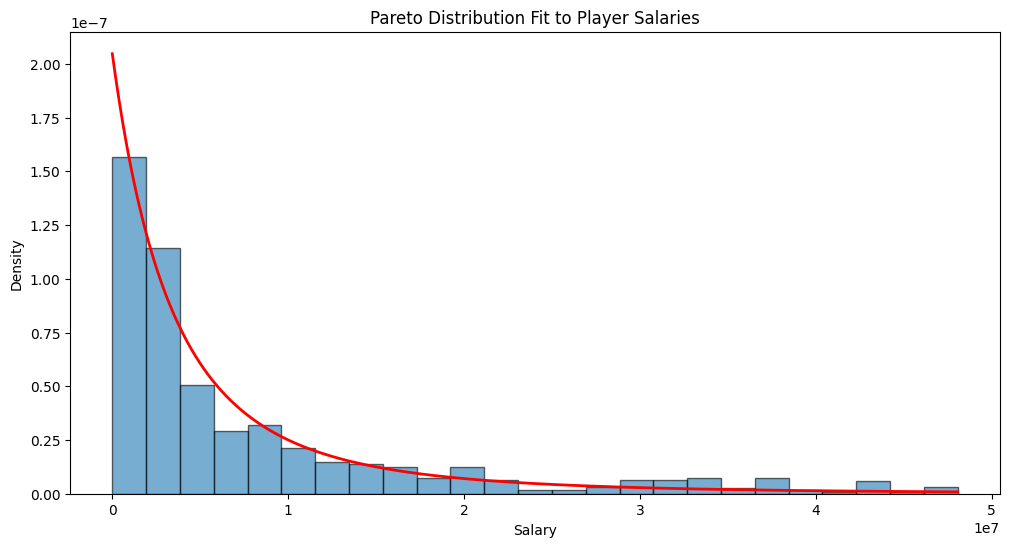

In [14]:
#is the pareto distribution a good fit?
# Plot the histogram of salaries
plt.figure(figsize=(12, 6))
plt.hist(merged_df['Salary'], bins=25, edgecolor='black', density=True, alpha=0.6)

# Plot the PDF of the fitted Pareto distribution
x = np.linspace(merged_df['Salary'].min(), merged_df['Salary'].max(), 1000)
pdf = pareto.pdf(x, *params)
plt.plot(x, pdf, 'r-', lw=2)

plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Pareto Distribution Fit to Player Salaries')
plt.show()



In [15]:
#calculate the parameters of the pareto distribution
# Calculate the parameters of the Pareto distribution
k, loc, scale = params
print('Pareto Distribution Parameters:')
print(f'k = {k}')
print(f'loc = {loc}')
print(f'scale = {scale}')


Pareto Distribution Parameters:
k = 2.2645656239343612
loc = -11055523.2163472
scale = 11061372.216347199


In [ ]:
#explain the parameters of the pareto distribution
# The Pareto distribution has three parameters:
# k: The shape parameter, which determines the shape of the distribution. It is the same as the shape parameter in the scipy.stats.pareto function.
# loc: The location parameter, which shifts the distribution along the x-axis. It is the same as the loc parameter in the scipy.stats.pareto function.
# scale: The scale parameter, which scales the distribution along the x-axis. It is the same as the scale parameter in the scipy.stats.pareto function.

# Calculate the mean and variance of the fitted Pareto distribution
mean = pareto.mean(k, loc, scale)
variance = pareto.var(k, loc, scale)
print('Mean of the Pareto Distribution:', mean)
print('Variance of the Pareto Distribution:', variance)

#what does the density of the pareto distribution represent?
# The density of the Pareto distribution represents the probability of observing a salary at a given point on the x-axis. It is a measure of how likely it is to observe a salary in a particular salary range.


Mean of the Pareto Distribution: 8753020.366190283
Variance of the Pareto Distribution: 654917757849342.6


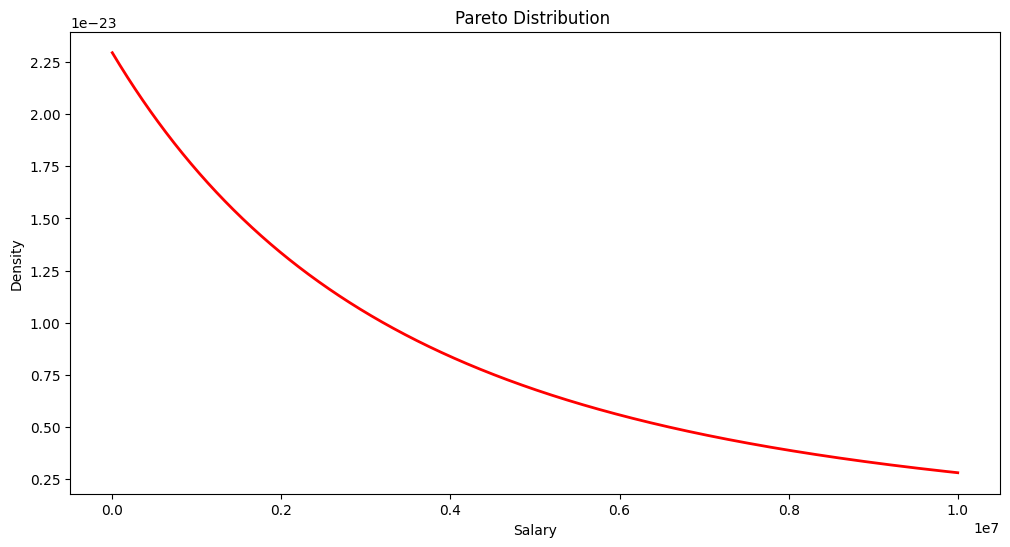

In [ ]:

x = np.linspace(0, 10000000, 1000)
pdf = pareto.pdf(x, 2.2645656239343612, -11055523.2163472)
plt.figure(figsize=(12, 6))
plt.plot(x, pdf, 'r-', lw=2)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Pareto Distribution ')
plt.show()


Text(0.5, 1.0, 'Pareto Distribution Fit to Salaries of Bad Teams')

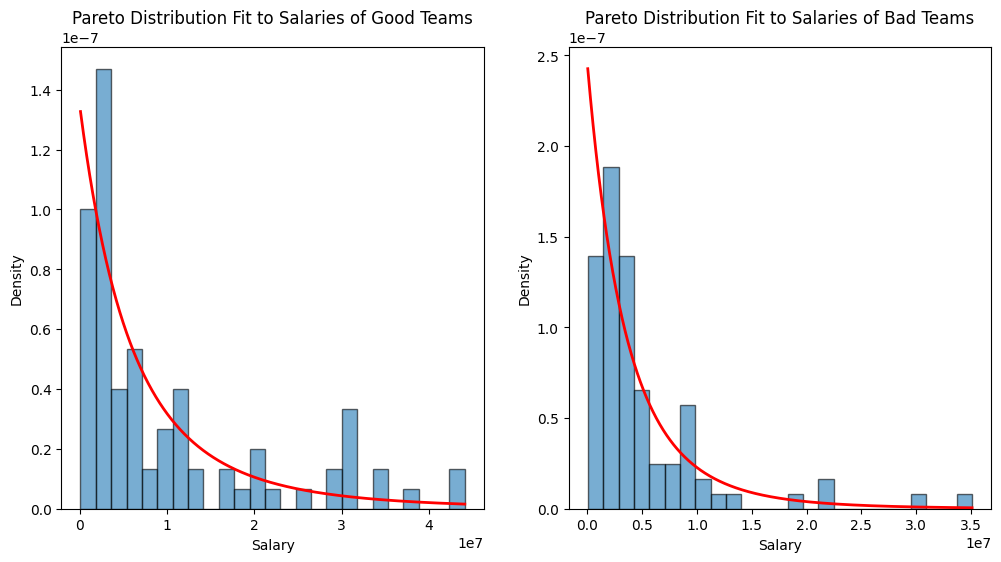

In [29]:
#create 2 different pareto distributions, one for the good teams and one for the bad teams
# Split the data into two groups based on team performance
good_teams = ['BOS', 'CLE', 'PHO', 'MIL', 'DEN']
bad_teams = ['CHO', 'DET', 'HOU', 'SAS', 'IND']

good_team_data = merged_df[merged_df['Tm'].isin(good_teams)]
bad_team_data = merged_df[merged_df['Tm'].isin(bad_teams)]

# Fit Pareto distributions to the salaries of the good and bad teams
good_params = pareto.fit(good_team_data['Salary'])
bad_params = pareto.fit(bad_team_data['Salary'])

# Plot the histogram of salaries for the good and bad teams on 2 subplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(good_team_data['Salary'], bins=25, edgecolor='black', density=True, alpha=0.6)
x = np.linspace(good_team_data['Salary'].min(), good_team_data['Salary'].max(), 1000)
pdf = pareto.pdf(x, *good_params)
plt.plot(x, pdf, 'r-', lw=2)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Pareto Distribution Fit to Salaries of Good Teams')

plt.subplot(1, 2, 2)
plt.hist(bad_team_data['Salary'], bins=25, edgecolor='black', density=True, alpha=0.6)
x = np.linspace(bad_team_data['Salary'].min(), bad_team_data['Salary'].max(), 1000)
pdf = pareto.pdf(x, *bad_params)
plt.plot(x, pdf, 'r-', lw=2)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Pareto Distribution Fit to Salaries of Bad Teams')



In [30]:
# Parameters for the Pareto distribution of good teams
good_k, good_loc, good_scale = good_params
print('Pareto Distribution Parameters for Good Teams:')
print(f'k = {good_k}')
print(f'loc = {good_loc}')
print(f'scale = {good_scale}')

# Parameters for the Pareto distribution of bad teams
bad_k, bad_loc, bad_scale = bad_params
print('Pareto Distribution Parameters for Bad Teams:')
print(f'k = {bad_k}')
print(f'loc = {bad_loc}')
print(f'scale = {bad_scale}')

Pareto Distribution Parameters for Good Teams:
k = 3.717355987589288
loc = -27918797.363779537
scale = 28018235.363779534
Pareto Distribution Parameters for Bad Teams:
k = 5.815523238187749
loc = -23938606.443111863
scale = 23970777.44311186


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the NBA teams
nba_teams = [
    "Atlanta Hawks", "Boston Celtics", "Brooklyn Nets", "Charlotte Hornets", "Chicago Bulls",
    "Cleveland Cavaliers", "Dallas Mavericks", "Denver Nuggets", "Detroit Pistons", "Golden State Warriors",
    "Houston Rockets", "Indiana Pacers", "LA Clippers", "Los Angeles Lakers", "Memphis Grizzlies",
    "Miami Heat", "Milwaukee Bucks", "Minnesota Timberwolves", "New Orleans Pelicans", "New York Knicks",
    "Oklahoma City Thunder", "Orlando Magic", "Philadelphia 76ers", "Phoenix Suns", "Portland Trail Blazers",
    "Sacramento Kings", "San Antonio Spurs", "Toronto Raptors", "Utah Jazz", "Washington Wizards"
]

# Parameters for Pareto distributions for rich and poor teams
pareto_params = {
    "rich": {"alpha": 2.0, "scale": 10_000_000, "max_value": 50_000_000},  # Higher average with max limit
    "poor": {"alpha": 3.0, "scale": 3_000_000, "max_value": 15_000_000}   # Lower average with lower max limit
}

# Function to sample contracts with truncated Pareto sampling
def sample_truncated_pareto(category, num_contracts=18):
    alpha = pareto_params[category]["alpha"]
    scale = pareto_params[category]["scale"]
    max_value = pareto_params[category]["max_value"]

    # Generate more samples than needed initially
    initial_samples = (np.random.pareto(alpha, num_contracts * 5) + 1) * scale

    # Filter samples to apply the max value constraint
    truncated_samples = initial_samples[initial_samples <= max_value]

    # Continue generating more samples if not enough are within the max constraint
    while len(truncated_samples) < num_contracts:
        extra_samples = (np.random.pareto(alpha, num_contracts) + 1) * scale
        truncated_samples = np.concatenate((truncated_samples, extra_samples[extra_samples <= max_value]))

    # Return only the first `num_contracts` samples after truncation
    return truncated_samples[:num_contracts]

# Create a DataFrame to store contracts for each team
contracts_data = []

# Assign each team as "rich" or "poor"
np.random.seed(42)  # For reproducibility
team_categories = np.random.choice(["rich", "poor"], size=len(nba_teams))

for team, category in zip(nba_teams, team_categories):
    contracts = sample_truncated_pareto(category)
    team_row = [team, category] + list(contracts)
    contracts_data.append(team_row)

# Define column names
columns = ["Team", "Category"] + [f"Contract{i+1}" for i in range(18)]

# Create the DataFrame
contracts_df = pd.DataFrame(contracts_data, columns=columns)

# Display the first few rows of the DataFrame
contracts_df.head()

# Save the DataFrame to a CSV file



,Team,Category,Contract1,Contract2,Contract3,Contract4,Contract5,Contract6,Contract7,Contract8,Contract9,Contract10,Contract11,Contract12,Contract13,Contract14,Contract15,Contract16,Contract17,Contract18
0,Atlanta Hawks,rich,1.106615e+07,1.198867e+07,1.450581e+07,1.326798e+07,1.187810e+07,1.605099e+07,1.078011e+07,1.188578e+07,1.256259e+07,1.355903e+07,2.157539e+07,1.117806e+07,1.434784e+07,1.566357e+07,1.024067e+07,1.596265e+07,1.097989e+07,1.034204e+07
1,Boston Celtics,poor,3.300889e+06,3.577650e+06,4.797982e+06,3.271387e+06,3.081183e+06,3.362414e+06,3.181062e+06,7.268832e+06,5.201297e+06,4.191717e+06,5.944415e+06,5.161714e+06,3.213768e+06,6.310512e+06,3.884440e+06,5.195165e+06,6.381223e+06,3.408217e+06
2,Brooklyn Nets,rich,1.239594e+07,1.910247e+07,3.117554e+07,2.975959e+07,2.131404e+07,1.671390e+07,1.044926e+07,1.092149e+07,3.139662e+07,1.594001e+07,1.004630e+07,1.054955e+07,1.723886e+07,1.002540e+07,1.091615e+07,1.488619e+07,1.801568e+07,1.695064e+07
3,Charlotte Hornets,rich,1.018471e+07,1.367937e+07,1.478676e+07,1.183901e+07,1.563327e+07,1.015608e+07,1.019214e+07,2.374236e+07,1.250186e+07,1.070306e+07,1.446760e+07,2.085115e+07,1.129256e+07,1.628419e+07,1.045615e+07,1.026888e+07,1.460757e+07,1.475438e+07
4,Chicago Bulls,rich,1.211766e+07,2.538982e+07,1.011843e+07,2.321620e+07,1.180032e+07,1.064894e+07,1.815894e+07,1.641646e+07,2.856817e+07,1.942832e+07,2.255785e+07,1.180180e+07,1.102595e+07,2.002464e+07,2.275283e+07,1.304787e+07,1.261904e+07,2.114836e+07


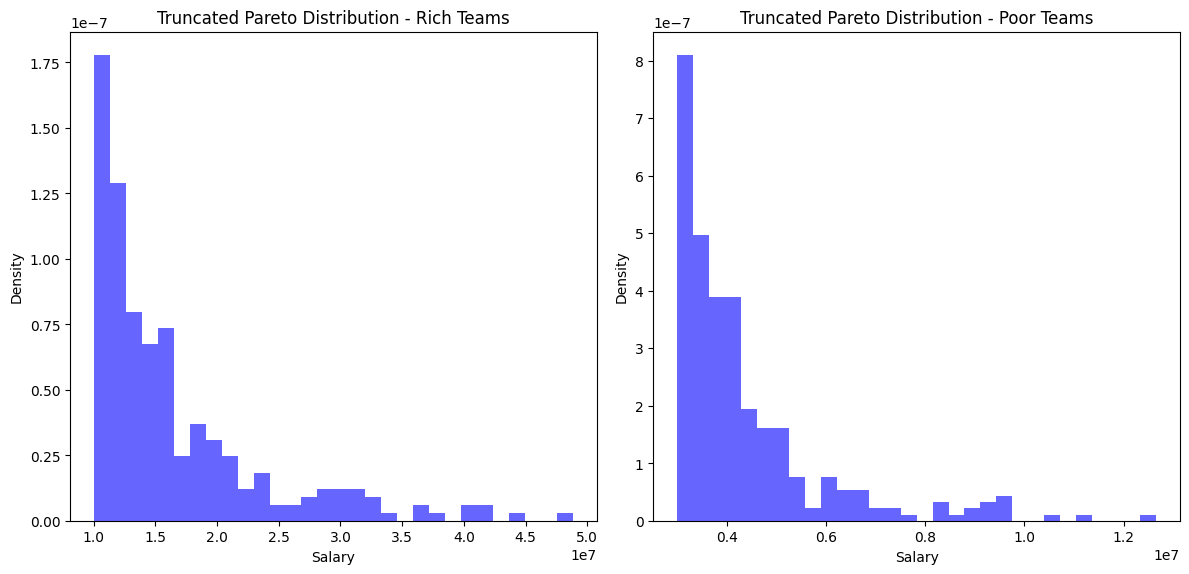

In [6]:
# Plotting histograms to visualize the truncated Pareto distributions for rich and poor teams
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for rich teams
rich_contracts = contracts_df[contracts_df['Category'] == 'rich'].iloc[:, 2:].values.flatten()
axs[0].hist(rich_contracts, bins=30, density=True, alpha=0.6, color='b')
axs[0].set_title("Truncated Pareto Distribution - Rich Teams")
axs[0].set_xlabel("Salary")
axs[0].set_ylabel("Density")

# Plot for poor teams
poor_contracts = contracts_df[contracts_df['Category'] == 'poor'].iloc[:, 2:].values.flatten()
axs[1].hist(poor_contracts, bins=30, density=True, alpha=0.6, color='b')
axs[1].set_title("Truncated Pareto Distribution - Poor Teams")
axs[1].set_xlabel("Salary")
axs[1].set_ylabel("Density")

plt.tight_layout()
plt.show()


In [ ]:
#todo koltott penzbol es egyebekbol megmondani milyen eloszlasu a fizetesek eloszlasa -> regresszio

#ha nem tudjuk azt h mennyi a penz de tudjuk h milyen sikeres a csapat akkor is tudunk illeszteni egy regressziot

In [ ]:
#kesobb shapely value, parameter featureok mekkora szerepet jatszanak a performanceban -> ez alapján pedig a competitive balance-t lehetne vizsgalni

#bevetel es nba parameterek alapjan a megtanult eloszlast hasznalva megmondani h milyen eloszlasu a fizetesek eloszlasa